In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
data=np.loadtxt("08500M.track.eep") 
data=np.transpose(data)
data1=np.loadtxt("zams-all-mass.txt")
data1=np.transpose(data1)
data2=np.loadtxt("tbgb-all-mass.txt")
data2=np.transpose(data2)
data3=np.loadtxt("tms-all-mass.txt")
data3=np.transpose(data3)
data9=np.loadtxt("gen-85-014z.txt")
data9=np.transpose(data9)
data4=np.loadtxt("zams-all-geneva.txt")
data4=np.transpose(data4)
data5=np.loadtxt("tms-all-geneva.txt")
data5=np.transpose(data5)
#data5.sort(axis=2)
#data2.sort(axis=1)
tM=data[0]
#tMist=age[202:1000]/10**6
#print(age[605]/10**6)
tzMist=data1[0]
tgMist=data2[0]
MMistg=data2[1]
MMist=data3[1]
tmsMist=data3[0]
LogL=data[6]
LogR=data[13]
LogT=data[11]
gent=data9[0]
Lg=data9[2]
Rg=data9[3]
#print(t)
M=data1[1]
#M=1.60
#Y=data2[0]-data1[0]
#print(np.shape(tgMist))
#print(np.shape(tzMist))
# print((data5[0]))
# print(data5[1])

# Hurley's Functions

In [4]:
Z=0.014
sig=np.log10(Z)
zt=np.log10(Z/0.02)
rho=zt+1.0


In [5]:


Mhook=1.0185+0.16015*zt+0.0892*zt**2    ##the initial mass above which a hook appears in the MS

Mhef=1.995+0.25*zt+0.087*zt**2  ##the max init mass for which He ignites degenerately in a helium flash

Mfgb=(13.048*(Z/0.02)**0.06)/(1+0.0012*(0.02/Z)**1.27)## the max init mass for which He ignites on the ffirst giant branch 

print(Mhook, Mhef, Mfgb)


0.9958327709631855 1.9583620417006102 12.74767066518963


In [6]:

#M=[0.8,1.0,1.25,1.60]
#M=1.25
#tau=np.linspace(0,1,num=100)

a=np.zeros(100)
a[1]=1.593890*10**3+2.053038*(10**3)*(zt)+1.231226*10**3*(zt**2)+2.327785*(10**2)*(zt**3)
a[2]=2.706708*10**3+1.483131*10**3*zt+5.772723*10**2*(zt**2)+7.411230*10*(zt**3)
a[3]=1.466143*10**2-1.048442*10**2*zt-6.795374*10*(zt**2)-1.391127*10*(zt**3)
a[4]=4.141960*10**(-2)+4.564888*10**(-2)*zt+2.958542*10**(-2)*(zt**2)+5.571483*10**(-3)*(zt**3)
a[5]=3.426349*10**-1
a[6]=1.949814*10+1.758178*zt-6.008212*zt**2-4.470533*zt**3
a[7]=4.903830
a[8]=5.212154*10**(-2)+3.166411*10**(-2)*zt-2.750074*10**(-3)*zt**2-2.271549*10**(-3)*zt**3
a[9]=1.312179-3.294936*10**(-1)*zt+9.231860*10**(-2)*zt**2+2.610989*10**(-2)*zt**3
a[10]=8.073972*10**(-1)
a[11]=1.031538-2.434480*10**(-1)*zt+7.732821*zt**2+6.460705*zt**3+1.374484*zt**4
a[12]=1.043715-1.577474*zt-5.168234*zt**2-5.596506*zt**3-1.299394*zt**4
a[13]=7.859573*10**(+2)-8.542048*zt-2.642511*10*zt**2-9.585707*zt**3
a[14]=3.858911*10**(3)+2.459681*10**(3)*zt-7.630093*10**(1)*zt**2-3.486057*10**(2)*zt**3-4.861703*10**(1)*zt**4
a[15]=2.888720*10**(2)+2.952979*10**(2)*zt+1.850341*10**(2)*zt**2+3.797254*10**(1)*zt**3
a[16]=7.196580+5.613746*10**(-1)*zt+3.805871*10**(-1)*zt**2+8.398728*10**(-2)*zt**3
#####
a[11]=a[11]*a[14]
a[12]=a[12]*a[14]
la17=np.max([0.097-0.1072*(sig+3),np.max([0.097,np.min([0.1461,0.1461+0.1237*(sig+2)])])])
a[17]=10**la17
#####
a[18]=2.187715*10**(-1)-2.154437*zt-3.768678*zt**2-1.975518*zt**3-3.021475*10**(-1)*zt**4
a[19]=1.466440+1.839725*zt+6.442199*zt**2+4.023635*zt**3+6.957529*10**(-1)*zt**4
a[20]=2.652091*10**(1)+8.178458*10**(1)*zt+1.156058*10**(2)*zt**2+7.633811*10**(1)*zt**3+1.950698*10**(1)*zt**4
a[21]=1.472103-2.947609*zt-3.312828*zt**2-9.945065*10**(-1)*zt**3
a[22]=3.071048-5.679941*zt-9.745523*zt**2-3.594543*zt**3
a[23]=2.617890+1.019125*zt-3.292551*10**(-2)*zt**2-7.445123*10**(-2)*zt**3
a[24]=1.075567*10**(-2)+1.773287*10**(-2)*zt+9.610479*10**(-3)*zt**2-1.732469*10**(-3)*zt**3
a[25]=1.476246+1.899331*zt+1.195010*zt**2+3.035051*10**(-1)*zt**3
a[26]=5.502535-6.601663*10**(-2)*zt+9.968707*10**(-2)*zt**2+3.599801*10**(-2)*zt**3
#####
a[18]=a[18]*a[20]
a[19]=a[19]*a[20]
#####
a[27]=9.511033*10+6.819618*10*zt-1.045625*10*zt**2-1.474939*10*zt**3
a[28]=3.113458*10+1.012033*10*zt-4.650511*zt**2-2.463185*zt**3
a[29]=1.413057+4.578814*10**(-1)*zt-6.850581*10**(-2)*zt**2-5.588658*10**(-2)*zt**3
a[30]=3.910862*10+5.196646*10*zt+2.264970*10*zt**2+2.873680*zt**3
a[31]=4.597479-2.855179*10**(-1)*zt+2.709724*10**(-1)*zt**2
a[32]=6.682518+2.827718*10**(-1)*zt-7.294429*10**(-2)*zt**2
#####
a[29]=a[29]**a[32]
a[33]=np.min([1.4,1.5135+0.3769*zt])
a[33]=np.max([0.6355-0.4192*zt,np.max([1.25,a[33]])])
#####
a[34]=1.910302*10**(-1)+1.158624*10**(-1)*zt+3.348990*10**(-2)*zt**2+2.599706*10**(-3)*zt**3
a[35]=3.931056*10**(-1)+7.277637*10**(-2)*zt-1.366593*10**(-1)*zt**2-4.508946*10**(-2)*zt**3
a[36]=3.267776*10**(-1)+1.204424*10**(-1)*zt+9.988332*10**(-2)*zt**2+2.455361*10**(-2)*zt**3
a[37]=5.990212*10**(-1)+5.570264*10**(-2)*zt+6.207626*10**(-2)*zt**2+1.777283*10**(-2)*zt**3
a[38]=7.330122*10**(-1)+5.192827*10**(-1)*zt+2.316416*10**(-1)*zt**2+8.346941*10**(-3)*zt**3
a[39]=1.172768-1.209262*10**(-1)*zt-1.193023*10**(-1)*zt**2-2.859837*10**(-2)*zt**3
a[40]=3.982622*10**(-1)-2.296279*10**(-1)*zt-2.262539*10**(-1)*zt**2-5.219837*10**(-2)*zt**3
a[41]=3.571038-2.223625*10**(-2)*zt-2.611794*10**(-2)*zt**2-6.359648*10**(-3)*zt**3
a[42]=1.9848+1.1386*zt+3.5640*10**(-1)*zt**2
a[43]=6.300*10**(-2)+4.810*10**(-2)*zt+9.840*10**(-3)*zt**2
a[44]=1.200+2.450*zt
######
a[42]=np.min([1.25,np.max([1.1,a[42]])])
a[44]=np.min([1.3,np.max([0.45,a[44]])])
######
a[45]=2.321400*10**(-1)+1.828075*10**(-3)*zt-2.232007*10**(-2)*zt**2-3.378734*10**(-3)*zt**3
a[46]=1.163659*10**(-2)+3.427682*10**(-3)*zt+1.421393*10**(-3)*zt**2-3.71066*10**(-3)*zt**3
a[47]=1.048020*10**(-2)-1.231921*10**(-2)*zt-1.686860*10**(-2)*zt**2-4.234354*10**(-3)*zt**3
a[48]=1.555590-3.223927*10**(-1)*zt-5.197429*10**(-1)*zt**2-1.066441*10**(-1)*zt**3
a[49]=9.7700*10**(-2)-2.3100*10**(-1)*zt-7.5300*10**(-2)*zt**2
a[50]=2.4000*10**(-1)+1.8000*10**(-1)*zt+5.9500*10**(-1)*zt**2
a[51]=3.3000*10**(-1)+1.3200*10**(-1)*zt+2.1800*10**(-1)*zt**2
a[52]=1.1064+4.1500*10**(-1)*zt+1.8000*10**(-1)*zt**2
a[53]=1.1900+3.7700*10**(-1)*zt+1.7600*10**(-1)*zt**2
######
a[49]=np.max([a[49],0.145])
a[50]=np.min([a[50],0.306+0.053*zt])
a[51]=np.min([a[51],0.3625+0.062*zt])
a[52]=np.max([a[52],0.9])
a[53]=np.max([a[53],1.0])
if (Z>0.01):
    a[52]=np.min([a[52],1.0])
    a[53]=np.min([a[53],1.1])
######
a[54]=3.855707*10**(-1)-6.104166*10**(-1)*zt+5.676742*zt**2+1.060894*10**(1)*zt**3+5.284014*zt**4
a[55]=3.579064*10**(-1)-6.442936*10**(-1)*zt+5.494644*zt**2+1.0554952*10**(1)*zt**3+5.280991*zt**4
a[56]=9.587587*10**(-1)+8.777464*10**(-1)*zt+2.017321*10**(-1)*zt**2
a[57]=1.5135+3.7690*10**(-1)*zt
######
a[57]=np.min([1.4,a[57]])
a[57]=np.max([0.6355-0.4192*zt,np.max([1.25,a[57]])])
######
a[58]=4.9907546*10**(-1)-1.683928*10**(-1)*zt-3.108742*10**(-1)*zt**2-1.623246*10**(-2)*zt**3
a[59]=4.537070-4.465455*zt-1.612690*zt**2-1.623246*zt**3
a[60]=1.796220+2.814020*10**(-1)*zt+1.423325*zt**2+3.421036*10**(-1)*zt**3
a[61]=2.256216+3.773400*10**(-1)*zt+1.537867*zt**2+4.396373*10**(-1)*zt**3
a[62]=8.4300*10**(-2)-4.7500*10**(-2)*zt-3.5200*10**(-2)*zt**2
a[63]=7.3600*10**(-2)+7.49*10**(-2)*zt+4.42*10**(-2)*zt**2
a[64]=1.3600*10**(-1)+3.5200*10**(-2)*zt
a[65]=1.564231*10**(-3)+1.653042*10**(-3)*zt-4.439786*10**(-3)*zt**2-4.951011*10**(-3)*zt**3-1.216530*10**(-3)*zt**4
a[66]=1.4770+2.9600*10**(-1)*zt
a[67]=5.210157-4.143695*zt-2.120870*zt**2
a[68]=1.1160+1.6600*10**(-1)*zt
#######
if (Z<0.004):
    a[63]=np.min([0.055,a[63]])
a[62]=np.max([0.065,a[62]])
a[64]=np.max([0.091,np.min([0.121,a[64]])])
a[66]=np.max([a[66],np.min([1.6,-0.308-1.046*zt])])
a[66]=np.max([0.8,np.min([0.8-2.0*zt,a[66]])])
a[68]=np.max([0.9,np.min([a[68],1.0])])
a[68]=np.min([a[68],a[66]])
######
a[69]=1.071489-1.164852*10**(-1)*zt-8.623831*10**(-2)*zt**2-1.582349*10**(-2)*zt**3
a[70]=7.108492*10**(-1)+7.935927*10**(-1)*zt+3.926983*10**(-1)*zt**2+3.622146*10**(-2)*zt**3
a[71]=3.478514-2.585474*10**(-2)*zt-1.512955*10**(-2)*zt**2-2.833691*10**(-3)*zt**3
a[72]=9.132108*10**(-1)-1.653695*10**(-1)*zt+3.636784*10**(-2)*zt**3
a[73]=3.969331*10**(-3)+4.539076*10**(-3)*zt+1.720906*10**(-3)*zt**2+1.897857*10**(-4)*zt**3
a[74]=1.600+7.640*10**(-1)*zt+3.322*10**(-1)*zt**2
######
if (Z>0.01):
    a[72]=np.max([a[72],0.95]) ## for Z>0.01
a[74]=np.max([1.4,np.min([a[74],1.6])])
######
a[75]=8.109*10**(-1)-6.282*10**(-1)*zt
a[76]=1.192334*10**(-2)+1.083057*10**(-2)*zt+1.230969*zt**2+1.551656*zt**3
a[77]=-1.668868*10**(-1)+5.818123*10**(-1)*zt-1.105027*10*zt**2-1.6668070*10*zt**3
a[78]=7.615495*10**(-1)+1.068243*10**(-1)*zt-2.011333*10**(-1)*zt**2-9.371415*10**(-2)*zt**3
a[79]=9.409838+1.522928*zt
a[80]=-2.7110*10**(-1)-5.7560*10**(-1)*zt-8.3800*10**(-2)*zt**2
a[81]=2.4930+1.1475*zt
######
a[75]=np.max([1.0,np.min([a[75],1.27])])
a[75]=np.max([a[75],0.6355-0.4192*zt])
a[76]=np.max([a[76],-0.1015564-0.2161264*zt-0.05182516*zt**2])
a[77]=np.max([-0.3868776-0.5457078*zt-0.1463472*zt**2,np.min([0.0,a[77]])])
a[78]=np.max([0.0,np.min([a[78],7.454+9.046*zt])])
a[79]=np.min([a[79],np.max([2.0,-13.3-18.6*zt])])
a[80]=np.max([0.0585542,a[80]])
a[81]=np.min([1.5,np.max([0.4,a[81]])])
######
#print (a)

In [7]:
b=np.zeros(60)
b[1]=3.9700*10**(-1)+2.8826*10**(-1)*zt+5.2930*10**(-1)*zt**2
b[2]=10**(-4.6739-0.9394*sig)
b[2]=np.min([np.max([b[2],-0.04167+55.67*Z]),0.4771-9329.21*Z**2.94])
lgb3=np.max([-0.1451,-2.2794-1.5175*sig-0.254*sig**2])
b[3]=10**lgb3
b[3]=np.max([b[3],0.7307+14265.1*Z**3.395]) ##for Z>0.004
b[4]=9.960283*10**(-1)+8.164393*10**(-1)*zt+2.383830*zt**2+2.223436*zt**3+8.638115*10**(-1)*zt**4
b[5]=2.561062*10**(-1)+7.072646*10**(-2)*zt-5.444596*10**(-2)*zt**2-5.798167*10**(-2)*zt**3-1.349129*10**(-2)*zt**4
b[6]=1.157338+1.467883*zt+4.299661*zt**2+3.130500*zt**3+6.992080*10**(-1)*zt**4
b[7]=4.022765*10**(-1)+3.050010*10**(-1)*zt+9.962137*10**(-1)*zt**2+7.914079*10**(-1)*zt**3+1.728098*10**(-1)*zt**4
######
b[4]=b[4]+0.1231572*zt**5
b[6]=b[6]+0.01640687*zt**5
######
b[9]=2.751631*10**(3)+3.557098*10**(2)*zt
b[10]=-3.820831*10**(-2)+5.872664*10**(-2)*zt
b[11]=(1.071738*10**(2)-8.970339*10**(1)*zt-3.949739*10**(1)*zt**2)**2
b[12]=7.348793*10**(2)-1.531020*10**(2)*zt-3.793700*10**(1)*zt**2
b[13]=(9.219293-2.005865*zt-5.561309*10**(-1)*zt**2)**2
b[14]=2.917412*10**(0)+1.575290*10**(0)*zt+5.751814*10**(-1)*zt**2
b[15]=3.629118*10**(0)-9.112722*10**(-1)*zt+1.042291*10**(0)*zt**2
b[16]=4.916389*10**(0)+2.862149*10**(0)*zt+7.844850*10**(-1)*zt**2
b[14]=b[14]**b[15]
b[16]=b[16]**b[15]
b[17]=1.0
######
if (zt > (-1.0)):
    b[17]=1.0-0.3880523*(zt+1.0)**(2.862149)
######    
b[18]=5.496045*10-1.289968*10*zt+6.385758*zt**2
b[19]=1.832694-5.766608*10**(-2)*zt+5.696128*10**(-2)*zt**2
b[20]=1.211104*10**(2)
b[21]=2.214088*10**(2)+2.187113*10**(2)*zt+1.170177*10*zt**2-2.635340*10*zt**3
b[22]=2.063983+7.363827*10**(-1)*zt+2.654323*10**(-1)*zt**2-6.140719*10**(-2)*zt**3    
b[23]=2.003160+9.388871*10**(-1)*zt+9.656450*10**(-1)*zt**2+2.362266*10**(-1)*zt**3
b[24]=1.609901*10+7.391573*zt+2.277010*10*zt**2+8.334227*zt**3
b[25]=1.747500*10**(-1)+6.271202*10**(-2)*zt-2.324229*10**(-2)*zt**2-1.844559*10**(-2)*zt**3
b[26]=5.0-(0.09138012*Z)**(-0.3671407)
b[27]=2.752869+2.729201*10**(-2)*zt+4.996927*10**(-1)*zt**2+2.496551*10**(-1)*zt**3
b[28]=3.518506+1.112440*zt-4.556216*10**(-1)*zt**2-2.179426*10**(-1)*zt**3
######
b[24]=b[24]**b[28]
b[27]=b[27]**(2*b[28])
#####
b[29]=1.626062*10**(2)-1.168838*10**(1)*zt-5.498343*10**(0)*zt**2
b[30]=3.336833*10**(-1)-1.458043*10**(-1)*zt-2.011751*10**(-2)*zt**2
b[31]=7.425137*10+1.790236*10**(1)*zt+3.033910*10**(1)*zt**2+1.018259*10**(1)*zt**3
b[32]=9.268325*100-9.739859*10**(1)*zt-7.702152*10**(1)*zt**2-3.158268*10**(1)*zt**3
b[33]=2.474401+3.892972*10**(-1)*zt
b[34]=1.127018*10+1.622158*zt-1.443664*zt**2-9.474699*10**(-1)*zt**3
######
b[31]=b[31]**b[33]
b[34]=b[34]**b[33]
######
b[36]=1.445216*10**(-1)-6.180219*10**(-2)*zt+3.093878*10**(-2)*zt**2+1.567090*10**(-2)*zt**3
b[37]=4.0*(1.304129+1.395919*10**(-1)*zt+4.142455*10**(-3)*zt**2-9.732503*10**(-3)*zt**3)
b[38]=(5.114149*10**(-1)-1.160850*10**(-2))**4
b[39]=1.314955*100+2.009258*10**(1)*zt-5.143082*10**(-1)*zt**2-1.379140*10**(0)*zt**3
b[40]=1.823973*10-3.074559*zt-4.307878*zt**2
b[41]=2.327037+2.403445*zt+1.208407*zt**2+2.087263*10**(-1)*zt**3
b[42]=1.997378-8.126205*10**(-1)*zt
b[43]=1.079113*10**(-1)+1.762409*10**(-2)*zt+1.096601*10**(-2)*zt**2+3.058818*10**(-3)*zt**3
b[44]=(2.327409+0.6901582*zt-0.2158431*zt**2-0.1084117*zt**3)**5
b[45]=1.0-(2.47162*rho-5.401682*rho**2+3.247361*rho**3)
b[46]=2.214315-1.975747*zt
b[47]=1.127733*rho+0.2344416*rho**2-0.3793726*rho**3
b[48]=5.072525+1.146198*10*zt+6.961724*zt**2+1.316965*zt**3
b[49]=5.139740
######
if (rho<=0.0):
    b[45]=1.0

b[36]=b[36]**4
b[40]=np.max([b[40],1.0])
b[41]=b[41]**b[42]
######
b[51]=1.125124+1.306486*zt+3.622359*zt**2+2.601976*zt**3+3.031270*10**(-1)*zt**4-0.1343798*zt**5
b[52]=0.3349489+4.531269*10**(-3)*zt+0.1131793*zt**2+0.2300156*zt**3+7.632745*10**(-2)*zt**4
b[53]=1.467794+2.798142*zt+9.455580*zt**2+8.963904*zt**3+3.339719*zt**4+0.4426929*zt**5
b[54]=4.658512*10**(-1)+0.2597451*zt+0.9048179*zt**2+0.7394505*zt**3+0.1607092*zt**3
b[55]=1.0422+0.13156*zt
b[56]=1.110866+0.9623856*zt+2.735487*zt**2+2.445602*zt**3+0.8826352*zt**4+0.1140142*zt**5
b[57]=-1.584333*10**(-1)-1.728865*10**(-1)*zt-4.461431*10**(-1)*zt**2-3.925259*10**(-1)*zt**3-0.1276203*zt**4-0.01308728*zt**5
b[55]=np.min([0.99164-743.123*(Z)**2.83,b[55]])


In [8]:
#M=1
#Me=2
#if (M <= Mhef):
#    Mce=2/5*Me 

#if (M >= Mhef):
#    Mce=1/3*Me

In [9]:
x=np.max([0.95,np.min([0.95-0.03*(zt+0.30103),0.99])])
tMS=np.zeros_like(M)
tbgb=np.zeros_like(M)
for i in range(0,np.size(M)):
    tbgb[i]=(a[1]+a[2]*M[i]**4+a[3]*M[i]**5.5+M[i]**7)/(a[4]*M[i]**2+a[5]*M[i]**7)    ###base of the giant branch
    miu=np.max([0.5,1.0-0.01*np.max([a[6]/M[i]**a[7],a[8]+a[9]/M[i]**a[10]])])
    thook=miu*tbgb[i]
    tMS[i]=np.max([thook,x*tbgb[i]])
#tbgb=(a[1]+a[2]*M**4+a[3]*M**5.5+M**7)/(a[4]*M**2+a[5]*M**7)
#print(tbgb)

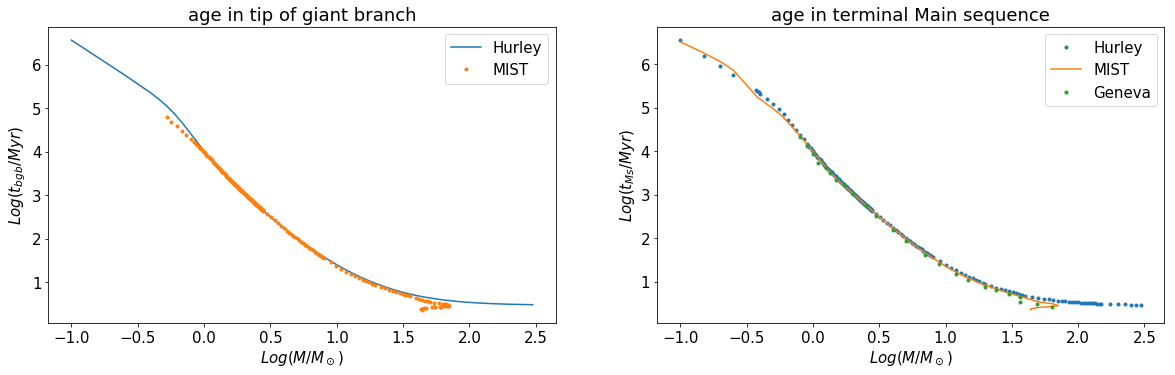

In [10]:
err=(tMS-tmsMist)/tmsMist
fig=plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
plt.rcParams.update({'font.size': 15})
#fig=plt.figure(figsize=(10,8))
plt.subplot(221)
plt.plot(np.log10(M),(np.log10(tbgb)),'-', label='Hurley')
plt.plot(np.log10(MMistg),np.log10(tgMist/10**6), '.', label='MIST')
plt.title("age in tip of giant branch")
plt.xlabel('$Log(M/M_\odot)$')
plt.ylabel('$Log(t_{bgb}/Myr)$')
plt.legend()

plt.subplot(222)
plt.plot(np.log10(M),(np.log10(tMS)),'.',label='Hurley')
plt.plot(np.log10(MMist),np.log10((tmsMist)/10**6),'-', label='MIST')
plt.plot(np.log10(data5[1]),np.log10(data5[0]/10**6),'.',label='Geneva')

plt.title("age in terminal Main sequence")
plt.xlabel('$Log(M/M_\odot)$')
plt.ylabel('$Log(t_{Ms}/Myr)$')

#plt.subplot(223)
# plt.plot(data1[3],data1[2],'-', label='zams')
# plt.plot(data2[3],data2[2],'.', label='tms')
# plt.plot(data3[3],data3[2],'-', label='bgb')
# plt.ylabel('$Log(L/L_\odot)$')
# plt.xlabel('$Log(t_{eff})$')
# #plt.plot(np.log10(M),np.log10(np.abs(err)),'.', label='error')
# #print(M)
# plt.xlim(5.2,3.4)

plt.legend()

# main sequence andHertzprung gap

In [11]:
#if (M < Mfgb):
#    Lehg=Lbgb
#    Rehg=Rgb
#if (M >= Mfgb):
#    Legh=LheI
#    Rehg=RheI
    
    

In [12]:
# for Z=0.02   tout et.al
alpha=0.39704170-0.32913574*zt+0.34776688*zt**2+0.37470851*zt**3+0.09011915*zt**4
beta=8.52762600-24.41225973*zt+56.4359717*zt**2+37.06152575*zt**3+5.45624060*zt**4
landa=0.00025546-0.00123461*zt-0.00023246*zt**2+0.00045519*zt**3+0.00016176*zt**4
delta=5.43288900-8.62157806*zt+13.44202049*zt**2+14.51584135*zt**3+3.39793084*zt**4
epsilon=5.56357900-10.32345224*zt+19.44322980*zt**2+18.97361347*zt**3+4.16903097*zt**4
zeta=0.78866060-2.90870942*zt+6.54713531*zt**2+4.05606657*zt**3+0.53287322*zt**4
miuh=0.00586685-0.01704237*zt+0.03872348*zt**2+0.02570041*zt**3+0.00383376*zt**4
Lzams=np.zeros_like(M)
Ltms=np.zeros_like(M)
for i in range(0,np.size(M)):
    Lzams[i]=(alpha*M[i]**5.5 + beta*M[i]**11.0)/(landa + M[i]**3.0 + delta*M[i]**5.0 + epsilon*M[i]**6.0 + zeta*M[i]**8.0 +miuh*M[i]**9.5)
    Ltms[i]=(a[11]*M[i]**3+a[12]*M[i]**4+a[13]*M[i]**(a[16]+1.8))/(a[14]+a[15]*M[i]**5+M[i]**a[16])

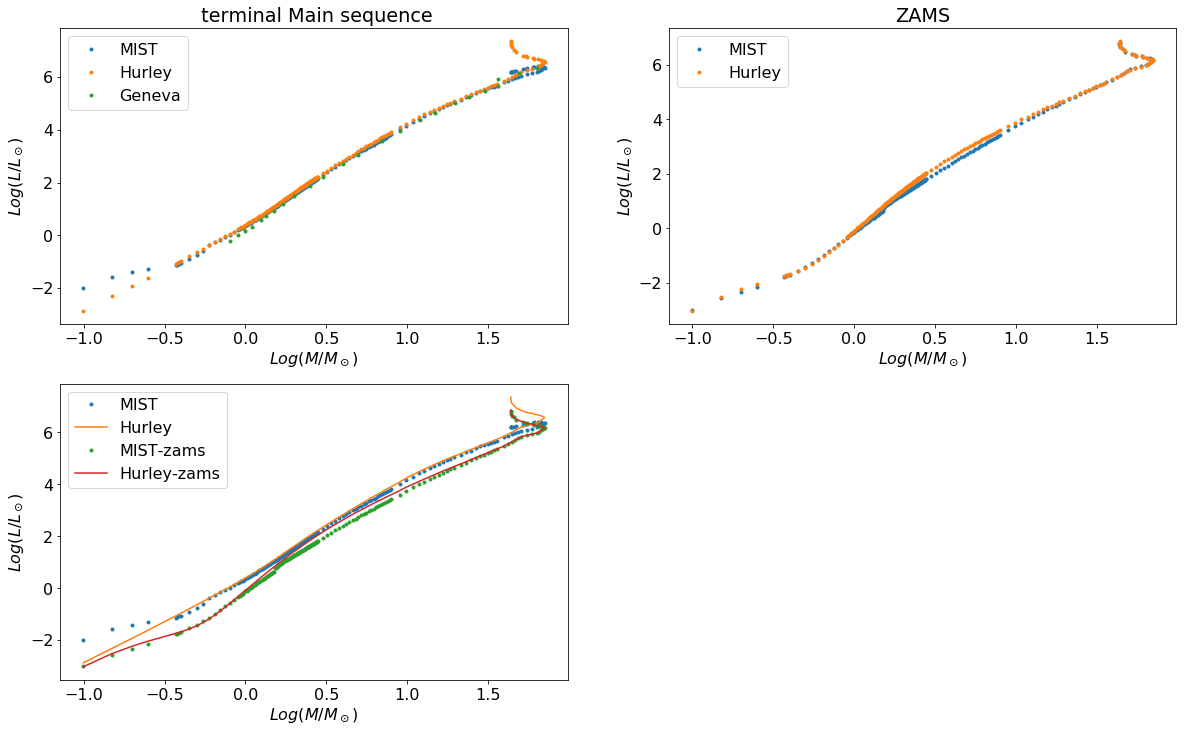

In [13]:
#plt.subplot(223)
fig=plt.figure(figsize=(20,12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
plt.rcParams.update({'font.size':16})
plt.subplot(221)
# plt.plot(np.log10(data1[1]),data1[2],'-', label='zams')
# plt.plot(np.log10(data2[1]),data2[2],'-', label='tms')
# plt.plot(np.log10(data3[1]),data3[2],'-', label='bgb')
# plt.title('MIST data')
# plt.ylabel('$Log(L/L_\odot)$')
# plt.xlabel('$Log(M/M_\odot)$')
# plt.legend()

# plt.subplot(222)
plt.plot(np.log10(data3[1]),data3[2], '.', label='MIST')
plt.plot(np.log10(data3[1]),np.log10(Ltms), '.', label= 'Hurley')
plt.plot(np.log10(data5[1]),data5[2],'.', label='Geneva')
plt.ylabel('$Log(L/L_\odot)$')
plt.xlabel('$Log(M/M_\odot)$')
plt.title(" terminal Main sequence")

plt.legend()

plt.subplot(222)
plt.plot(np.log10(data3[1]),data1[2], '.', label='MIST')
plt.plot(np.log10(data3[1]),np.log10(Lzams), '.', label= 'Hurley')

plt.ylabel('$Log(L/L_\odot)$')
plt.xlabel('$Log(M/M_\odot)$')
plt.title('ZAMS')
plt.legend()



plt.subplot(223)
plt.plot(np.log10(data3[1]),data3[2], '.', label='MIST')
plt.plot(np.log10(data3[1]),np.log10(Ltms), '-', label= 'Hurley')
plt.plot(np.log10(data3[1]),data1[2], '.', label='MIST-zams')
plt.plot(np.log10(data3[1]),np.log10(Lzams), '-', label= 'Hurley-zams')
plt.ylabel('$Log(L/L_\odot)$')
plt.xlabel('$Log(M/M_\odot)$')
#plt.title(" terminal Main sequence")
plt.legend()


plt.savefig('L-M.png')

In [14]:
# #for Z=0.02   tout et.al
# theta=1.71355900+0.62246212*zt-0.92557761*zt**2-1.16996966*zt**3-0.30631491*zt**4
# iota=6.59778800-0.42450044*zt-12.13339427*zt**2-10.73509484*zt**3-2.51487077*zt**4
# kappa=10.0885500-7.11727086*zt-31.67119479*zt**2-24.24848322*zt**3-5.33608972*zt**4
# lambd=1.01249500+0.032699690*zt-0.00923418*zt**2-0.03876858*zt**3-0.00412750*zt**4
# mu=0.07490166+0.02410413*zt+0.07233664*zt**2+0.03040464*zt**3+0.00197741*zt**4
# nu=0.01077422
# xi=3.08223400+0.94472050*zt-2.15200882*zt**2-2.49219496*zt**3-0.63848738*zt**4
# omicron=17.8477800-7.45345690*zt-48.96066856*zt**2-40.05386135*zt**3-9.09331816*zt**4
# pi=0.00022582-0.00186899*zt+0.00388783*zt**2+0.00142402*zt**3-0.00007671*zt**4
# Rzams=(theta*M**2.5 + iota*M**6.5 + kappa*M**11.0 + lambd*M**19.0 + mu*M**19.5 )/(nu + xi*M**2.0 + omicron*M**8.5 + M**18.5 + pi*M**19.5 )


In [15]:
M1=85.0
alpha=0.39704170-0.32913574*zt+0.34776688*zt**2+0.37470851*zt**3+0.09011915*zt**4
beta=8.52762600-24.41225973*zt+56.4359717*zt**2+37.06152575*zt**3+5.45624060*zt**4
landa=0.00025546-0.00123461*zt-0.00023246*zt**2+0.00045519*zt**3+0.00016176*zt**4
delta=5.43288900-8.62157806*zt+13.44202049*zt**2+14.51584135*zt**3+3.39793084*zt**4
epsilon=5.56357900-10.32345224*zt+19.44322980*zt**2+18.97361347*zt**3+4.16903097*zt**4
zeta=0.78866060-2.90870942*zt+6.54713531*zt**2+4.05606657*zt**3+0.53287322*zt**4
miuh=0.00586685-0.01704237*zt+0.03872348*zt**2+0.02570041*zt**3+0.00383376*zt**4

x=np.max([0.95,np.min([0.95-0.03*(zt+0.30103),0.99])])
Lzams1=(alpha*M1**5.5 + beta*M1**11.0)/(landa + M1**3.0 + delta*M1**5.0 + epsilon*M1**6.0 + zeta*M1**8.0 +miuh*M1**9.5)
tbgb1=(a[1]+a[2]*M1**4+a[3]*M1**5.5+M1**7)/(a[4]*M1**2+a[5]*M1**7)
Ltms1=(a[11]*M1**3+a[12]*M1**4+a[13]*M1**(a[16]+1.8))/(a[14]+a[15]*M1**5+M1**a[16])
miu=np.max([0.5,1.0-0.01*np.max([a[6]/M1**a[7],a[8]+a[9]/M1**a[10]])])
thook1=miu*tbgb1
tMS1=np.max([thook1,x*tbgb1])

In [16]:
#for Z=0.02   tout et.al
theta=1.71355900+0.62246212*zt-0.92557761*zt**2-1.16996966*zt**3-0.30631491*zt**4
iota=6.59778800-0.42450044*zt-12.13339427*zt**2-10.73509484*zt**3-2.51487077*zt**4
kappa=10.0885500-7.11727086*zt-31.67119479*zt**2-24.24848322*zt**3-5.33608972*zt**4
lambd=1.01249500+0.032699690*zt-0.00923418*zt**2-0.03876858*zt**3-0.00412750*zt**4
mu=0.07490166+0.02410413*zt+0.07233664*zt**2+0.03040464*zt**3+0.00197741*zt**4
nu=0.01077422
xi=3.08223400+0.94472050*zt-2.15200882*zt**2-2.49219496*zt**3-0.63848738*zt**4
omicron=17.8477800-7.45345690*zt-48.96066856*zt**2-40.05386135*zt**3-9.09331816*zt**4
pi=0.00022582-0.00186899*zt+0.00388783*zt**2+0.00142402*zt**3-0.00007671*zt**4
Rzams1=(theta*M1**2.5 + iota*M1**6.5 + kappa*M1**11.0 +lambd*M1**19.0 + mu*M1**19.5 )/(nu + xi*M1**2.0 + omicron*M1**8.5 + M1**18.5 + pi*M1**19.5 )


In [17]:

if (M1 <= a[17]):
     Rtms1=(a[18]+a[19]*M1**a[21])/(a[20]+M1**a[22])
if (M1>a[17]+0.1):
     Rtms1=(-8.672073*10**-2*M1**3+a[23]*M1**a[26]+a[24]*M1**(a[26]+1.5))/(a[25]+M1**5)
    

In [18]:
Rtms1=np.max([Rtms1,1.5*Rzams1])   # tms= terminate main sequance

In [19]:
B=np.min([(a[34]/a[33]**a[35]),(a[36]/a[33]**a[37])])

#print(a[33])
Lbgb1=(a[27]*M1**a[31]+a[25]*M1**9.301992)/(a[29]+a[30]*M1**4.637345)
if (M1<=Mhook):
    delL=0.0
if (Mhook< M1 < a[33]):
    delL=B*((M1-Mhook)/(a[33]-Mhook))**0.4
if (M1 > a[33]):
    delL=np.min([(a[34]/M1**a[35]),(a[36]/M1**a[37])])

# Main-sequence evolution

In [20]:
 print(a[41], a[42], a[44])
# M1=2.0
 C=(a[38]+a[39]*M1**3.5/a[40]*M1**3+M1**a[41])-1.0

if (M1<=Mhook):
     delR=0.0
if (Mhook < M1 <= a[42]):
     delR=a[43]*((M1-Mhook)/(a[42]-Mhook))**0.5
if (a[42]< M1 < 2.0):
     delR=a[43]+(C-a[43])*((M1-a[42])/(2.0-a[42]))**a[44]
if (M1 >= 0.2):
     delR=(a[38]+a[39]*M1**3.5/a[40]*M1**3+M1**a[41])-1.0

3.5738793863590397 1.25 0.8204901980349291


In [21]:
eps=0.01
t=np.linspace(0,tMS1,400)
tau1=np.zeros_like(t)
tau2=np.zeros_like(t)
for i in range(0,np.size(t)):
    tau1[i]=np.min([1.0,t[i]/thook1])
    tau2[i]=np.max([0.0,np.min([1.0,(t[i]-(1-eps)*thook1)/(eps*thook1)])])
    
D=(a[45]+a[46]*2.0**a[48])/(2.0**0.4+a[47]*2.0**1.9)

if (M1>=2.0):
    alfL=(a[45]+a[46]*M1**a[48])/(M1**0.4+a[47]*M1**1.9)
if (M1<0.5):
    alfL=a[49]
if (0.5<= M1 <0.7):
    alfL=a[49]+5.0*(0.3-a[49])*(M1-0.5)
if (0.7<= M1 < a[52]):
    alfL=0.3+(a[50]-0.3)*(M1-0.7)/(a[52]-0.7)
if (a[52]<= M1 < a[53]):
    alfL= a[50]+(a[51]-a[50])*(M1-a[52])/(a[53]-a[52])
if (a[53]<= M1 <2.0):
    alfL=a[51]+(D-a[51])*(M1-a[53])/(2.0-a[53])
    
    


In [22]:
betL=np.max([0.0,a[54]-a[55]*M1**a[56]])
G=np.max([0.0,a[54]-a[55]*a[57]**a[56]])
if (M1>a[57] and betL>0.0):
    betL=np.max([0.0,G-(10.0*(M1-a[57])*G)])

In [23]:
eta=10.0
#t=np.linspace(0,tMS1,400)
tau=np.zeros_like(t)
lgLms=np.zeros_like(t)


for i in range(0,np.size(t)):
    tau[i]=t[i]/tMS1
    lgLms[i]= alfL*tau[i]+betL*tau[i]**eta+(np.log10(Ltms1/Lzams1)-alfL-betL)*tau[i]**2-(delL*(tau1[i]**2-tau2[i]**2))


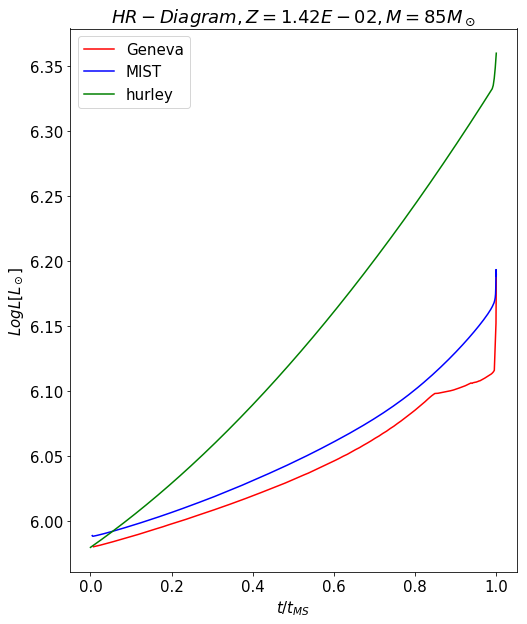

In [24]:

plt.rcParams.update({'font.size': 15})
fig=plt.figure(figsize=(8,10))
plt.plot((np.abs(gent[0:160]/gent[160])),Lg[0:160],'r-',label='Geneva')
plt.plot((tM[202:454]/tM[454]),LogL[202:454],'b-',label='MIST')
plt.plot(t/tMS1,lgLms+np.log10(Lzams1),'g-',label='hurley')
#plt.xlim(3.8,3.4)
plt.xlabel('$t/t_{MS}$')
plt.ylabel('$LogL[L_\odot]$')
plt.title('$HR-Diagram, Z=1.42E-02, M=85M_\odot$')
plt.legend()
plt.savefig('85M_s.png')

In [25]:
B=(a[58]*a[66]**a[60])/(a[59]*a[66]**a[61])
C=(a[58]*a[67]**a[60])/(a[59]*a[67]**a[61])

if (a[66]<=M1<=a[67]):
    alfR=(a[58]*M1**a[60])/(a[59]*M1**a[61])
if (M1<0.5):
    alfR=a[62]
if (0.5<=M1<0.65):
    alfR=a[62]+((a[63]-a[62])*(M1-0.5))/0.15
if (0.65<= M1 <a[68]):
    alfR=a[63]+((a[64]-a[63])*(M1-0.65))/(a[68]-0.65)
if (a[68]<= M1 < a[66]):
    alfR=a[64]+(B-a[64])*(M1-a[68])/(a[66]-a[68])
if (a[67]< M1):
    alfR= C+a[65]*(M1-a[67])


In [26]:
B=((a[69]*2.0**3.5)/(a[70]+2.0**a[71]))
C=((a[69]*16.0**3.5)/(a[70]+16.0**a[71]))

if (2.0<=M1<=16.0):
    betR=(a[69]*M1**3.5)/(a[70]+M1**a[71])
if (M1<=1.0):
    betR=1.06
if (1.0<=M1<a[74]):
    betR=1.06+((a[72]-1.06)*(M1-1.0))/(a[74]-1.06)
if (a[74]<= M1 <2.0):
    betR=a[72]+((B-a[72])*(M1-a[74]))/(2.0-a[74])
if (16.0< M1 ):
    betR=C+a[73]*(M1-16)

betR=betR-1.0

In [27]:
B=a[76]+a[77]*(1.0-a[78])**(a[79])
C=a[80]
if (a[75]<=1.0):
    C=B

if (M1>a[75]+0.1):
    gamm=0.0
if (M1<=1.0):
    gamm=a[76]+a[77]*(M1-a[78])**(a[79])
if (1.0<M1<=a[75]):
    gamm=B+(a[80]-B)*((M1-1.0)/(a[75]-1.0))**a[81]
if (a[75]<M1<a[75]+1.0):
    gamm=C-10.0*(M1-a[75])*C

In [28]:
eta=10.0
tau=np.zeros_like(t)
lgRms=np.zeros_like(t)

for i in range(0,np.size(t)):
    tau[i]=t[i]/tMS1
    lgRms[i]= alfR*tau[i]+betR*tau[i]**eta+gamm*tau[i]**40.0+(np.log10(Rtms1/Rzams1)-alfR-betR-gamm)*tau[i]**3.0-(delR*(tau1[i]**3-tau2[i]**3))


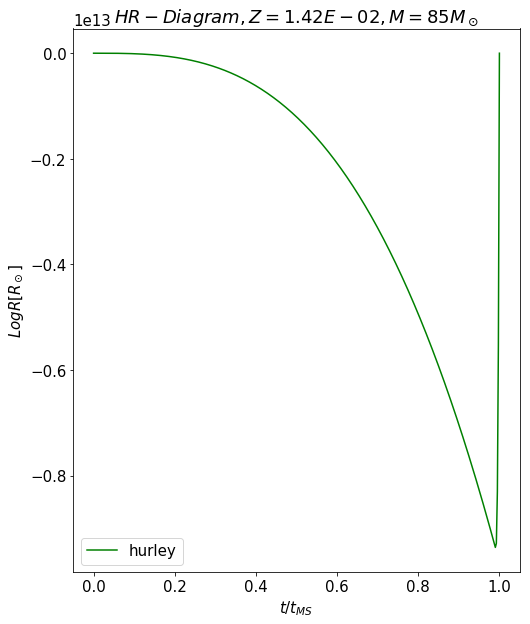

In [29]:
plt.rcParams.update({'font.size': 15})
fig=plt.figure(figsize=(8,10))
#plt.plot((np.abs(gent[0:160]/gent[160])),Rg[0:160],'r-',label='Geneva')
#plt.plot((tM[202:454]/tM[454]),LogR[202:454],'b-',label='MIST')
plt.plot(t/tMS1,lgRms+np.log10(Rzams1),'g-',label='hurley')
#plt.xlim(3.8,3.4)
plt.xlabel('$t/t_{MS}$')
plt.ylabel('$LogR[R_\odot]$')
plt.title('$HR-Diagram, Z=1.42E-02, M=85M_\odot$')
plt.legend()
plt.savefig('85M_s.png')

# hertzprung gap evolution

In [30]:
####During the HG
thg=t-tMS/(tbgb-tMS)
Lhg=Ltms*(Lehg/Ltms)**thg
Rhg=Rtms*(Rehg/Rtms)**thg

ValueError: operands could not be broadcast together with shapes (400,) (189,) 

In [30]:
 ###the core mass at the end of HG###
    Mcms=0.0
if (M<Mhef):
    Mcehg=Mcgb
if (Mhef<=M<Mfgb):
    Mcehg=Mcbgb
if (M>=Mfgb):
    Mcehg=McHeI

NameError: name 'Mcgb' is not defined

In [31]:
##at the beginning of  HG
rhho= (1.586+M**5.25)/(2.434+1.02*M**5.25)
Mctms=rhho*Mcehg
Mchg=((1-thg)*rhho+thg)*Mcehg

NameError: name 'Mcehg' is not defined

# first giant branch

In [33]:
#### Eggleton, Tout 1989

if (M<=Mhef):
    p=6
    q=3
    D0=5.37+0.135*zt
    lgD=D0
if (M>=2.5):
    p=5
    q=2
    lgD=np.max([-1.0,0.975*D0-0.18*M,0.5*D0-0.06*M])
    
D=10**lgD

In [42]:
###### E= eCNO/m(He4)=6.018*10**18 erg/g and Ah=1/E*X =2.37838*10-19 g/erg
### Ah1= 10**(np.max([-4.8,np.min([-5.7+0.8*M,-4.1+014*M])])) ####  mass dependant Ah from hurley 
Ah=1.44*10**-5 #####M_s L_s^-1 Myr^-1   for CNO cycle

tinf=tbgb+(1/(Ah*D*(p-1)))*(D/Lbgb)**(p-1)/p

tinf1=tbgb+(1/(p-1)*Ah*D)*(D/Lbgb)**((p-1)/p)

tx=tinf1-(tinf1-tbgb)*(Lbgb/Lx)((p-1)/p)

tinf2=tx+(1/((q-1)*Ah*B))*(B/Lx)**((q-1)/q)



NameError: name 'Lx' is not defined

In [45]:
def Mc(p,D,t):
    return ((p-1)*Ah*D*(tinf-t))**1/(1-p)
def L(D,p,t)
    return (D*((p-1)*Ah*D*(tinf-t))**p/(1-p))

#Lbgb=L(D,p,tbgb)
L=np.min([B*Mc**q,D*Mc**p])
Mx=(B/D)**1/(p-q)

In [46]:
if (LHeI<=Lx):
    tHeI=tinf1-(1/((p-1)*Ah*D))*(D/LHeI)**((p-1)/p)
if (LHeI>Lx):
    tHeI=tinf2-(1/((q-1)*Ah*B))*(B/LHeI)**((q-1)/q)

NameError: name 'LHeI' is not defined

In [49]:
###actual core mass at the BGB
c=np.zeros(10)
c[1]=9.20925*10**-5
c[2]=5.102216
tcgb=(t-tbgb)/(tHeI-tbgb)
C=Mc*(Lbgb*MHef)**4-c[1]*MHef**c[2]
Mcbgb=np.min([0.95*Mcbagb,(C+c[1]*M**c[2])])
Mcgb=Mcbgb+(McHeI-Mcbgb)*tcgb

NameError: name 'tHeI' is not defined

In [51]:
A=np.min([b[4]*M**(-b[5]),b[6]*M**(-b[7])])
def Rgb(A,L):
    return A*(L**b[1]+b[2]*L**b[3])
##Rgb=A*(L**b[1]+b[2]*L**b[3])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


# Core He-burning

In [ ]:
##the luminosity at he ignition is:
alpha1=(b[9]*Mhef**b[10]-LHeI*(Mhef))/(LHeI*Mhef)
if (M<Mhef):
    (b[9]*M**b[10])/(1+alpha1*np.log(15*(M-Mhef)))
if (M>=Mhef):
    (b[11]+b[12]*M**3.8)/(b[13]+M**2)